In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
np.random.seed(42)

dates = pd.date_range(start="2023-01-01", end="2024-12-31")

price = 100 + np.cumsum(np.random.normal(0, 2, len(dates)))

data = {
    "Date": dates,
    "Close_Price": price
}

df = pd.DataFrame(data)

os.makedirs("../../data/finance", exist_ok=True)
df.to_csv("../../data/finance/stock_data.csv", index=False)

df.head()


,Date,Close_Price
0,2023-01-01,100.993428
1,2023-01-02,100.716900
2,2023-01-03,102.012277
3,2023-01-04,105.058336
4,2023-01-05,104.590030


In [3]:
df = pd.read_csv("../../data/finance/stock_data.csv", parse_dates=["Date"])

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         731 non-null    datetime64[ns]
 1   Close_Price  731 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.6 KB


,Date,Close_Price
count,731,731.000000
mean,2024-01-01 00:00:00,94.855128
min,2023-01-01 00:00:00,72.946109
25%,2023-07-02 12:00:00,83.919312
50%,2024-01-01 00:00:00,92.531698
75%,2024-07-01 12:00:00,105.227837
max,2024-12-31 00:00:00,131.271291
std,NaN,12.875069


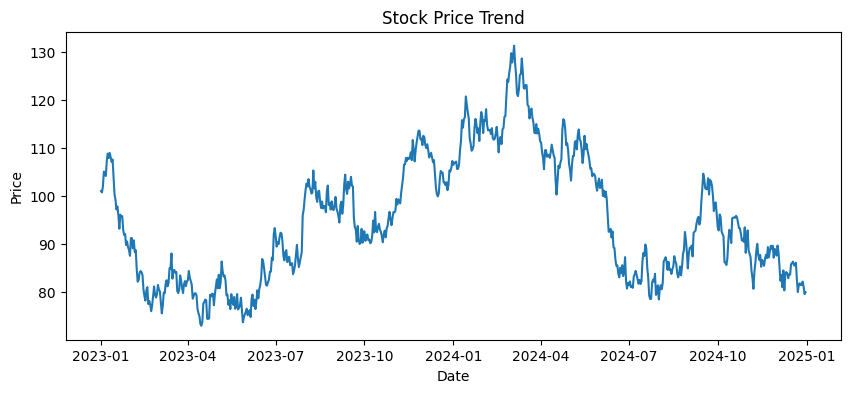

In [4]:
plt.figure(figsize=(10,4))
plt.plot(df["Date"], df["Close_Price"])
plt.title("Stock Price Trend")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


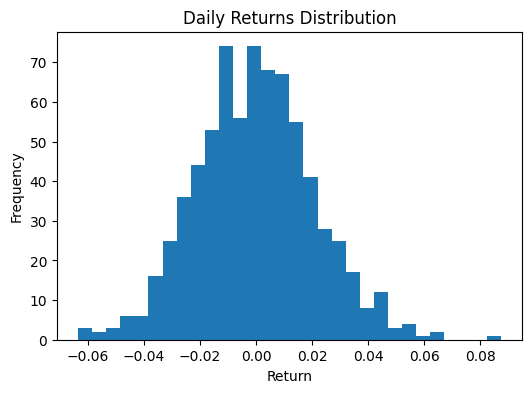

In [5]:
df["Daily_Return"] = df["Close_Price"].pct_change()

plt.figure(figsize=(6,4))
plt.hist(df["Daily_Return"].dropna(), bins=30)
plt.title("Daily Returns Distribution")
plt.xlabel("Return")
plt.ylabel("Frequency")
plt.show()


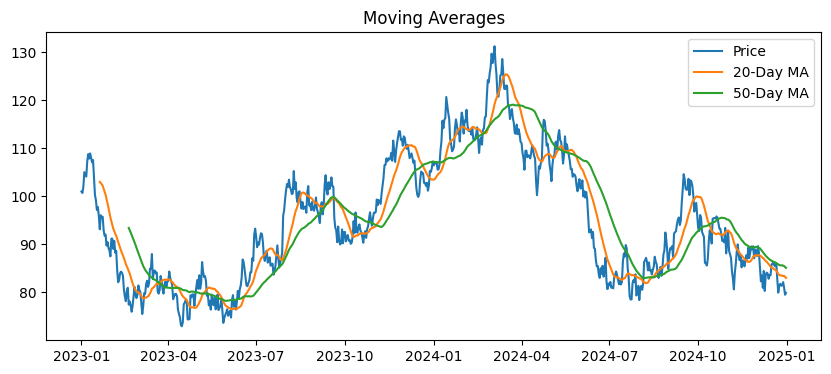

In [6]:
df["MA_20"] = df["Close_Price"].rolling(20).mean()
df["MA_50"] = df["Close_Price"].rolling(50).mean()

plt.figure(figsize=(10,4))
plt.plot(df["Date"], df["Close_Price"], label="Price")
plt.plot(df["Date"], df["MA_20"], label="20-Day MA")
plt.plot(df["Date"], df["MA_50"], label="50-Day MA")
plt.legend()
plt.title("Moving Averages")
plt.show()


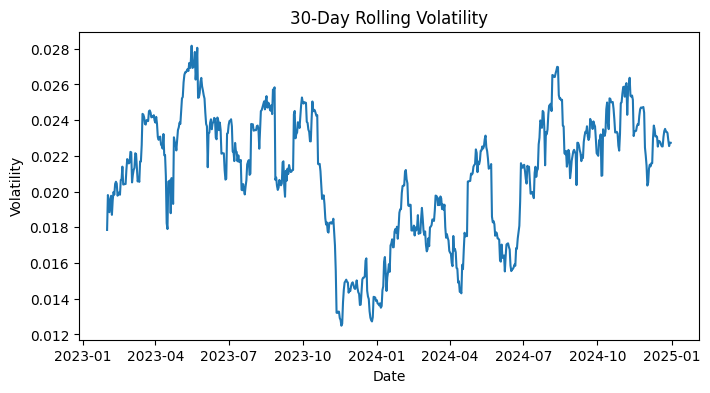

In [7]:
rolling_volatility = df["Daily_Return"].rolling(30).std()

plt.figure(figsize=(8,4))
plt.plot(df["Date"], rolling_volatility)
plt.title("30-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()


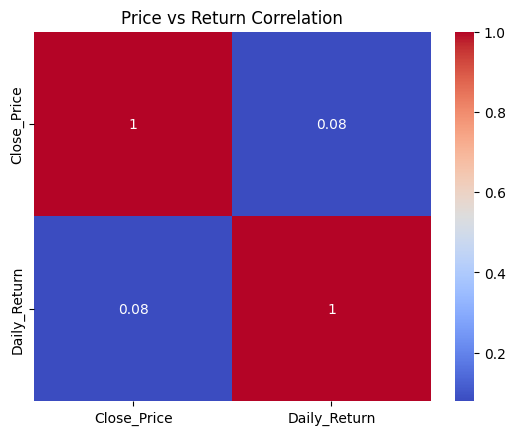

In [8]:
sns.heatmap(df[["Close_Price", "Daily_Return"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Price vs Return Correlation")
plt.show()


In [9]:
os.makedirs("../../visualizations/project5_finance_analysis", exist_ok=True)
print("Finance visualization directory ready")


Finance visualization directory ready


## 📌 Key Insights

1. Stock prices show long-term upward and downward trends.
2. Daily returns fluctuate around zero with occasional spikes.
3. Higher volatility periods indicate increased investment risk.
4. Moving averages help identify trend direction.

## 🎯 Recommendations

- Use moving averages for entry and exit strategies.
- Avoid high-volatility periods for low-risk portfolios.
- Combine return analysis with risk metrics for better decisions.
